In [17]:
from physical_parameters_SciNet.model_instances.n2_setting_mast_constant_time import config

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [18]:
path = config.DIR_RAW_DATA / "mast_magnetics_data_constant_time.nc"
ds = xr.open_dataset(path)

In [19]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                                   (shot_id: 6102, time: 1000,
                                               b_field_pol_probe_ccbv_channel: 37,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 17,
                                               flux_loop_channel: 14,
                                               b_field_tor_probe_saddle_voltage_channel: 9)
Coordinates:
  * shot_id                                   (shot_id) int32 24kB 12378 ... ...
  * time                                      (time) float64 8kB -0.05 ... 0.45
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) object 296B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) object 144B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) object 136B ...
  * flux_loop_channel                         (flux_loop_channel) object 112B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) object 72B ...
Data variables:
    b_field_pol_probe_ccbv_field              (shot_id, time, b_field_pol_probe_ccbv_channel) float64 2GB ...
    b_field_pol_probe_obr_field               (shot_id, time, b_field_pol_probe_obr_channel) float64 879MB ...
    b_field_pol_probe_obv_field               (shot_id, time, b_field_pol_probe_obv_channel) float64 830MB ...
    flux_loop_flux                            (shot_id, time, flux_loop_channel) float64 683MB ...
    b_field_tor_probe_saddle_voltage          (shot_id, time, b_field_tor_probe_saddle_voltage_channel) float64 439MB ...
    ip_ref                                    (shot_id, time) float64 49MB ...
    i_plasma                                  (shot_id, time) float64 49MB ...
    ip                                        (shot_id, time) float64 49MB ...

/tmp/ipykernel_3511248/2924384381.py:1: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  idx = np.random.randint(0, ds.dims['shot_id'])


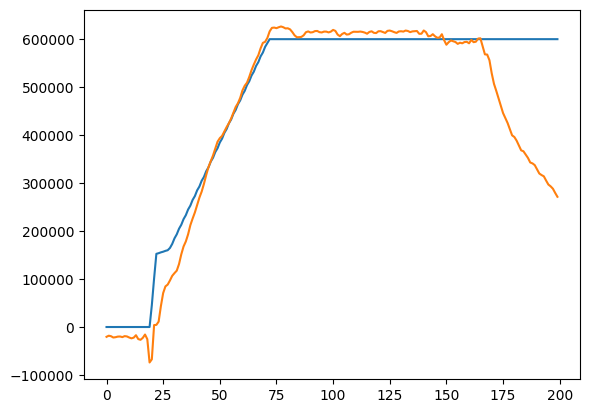

In [20]:
idx = np.random.randint(0, ds.dims['shot_id'])
plt.plot(ds.i_plasma.values[idx, :][::5])
plt.plot(ds.ip_ref.values[idx, :][::5])

In [21]:
path = config.DIR_RAW_DATA / "mast_magnetics_data_variable_time.nc"
ds = xr.open_dataset(path)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
ds

<xarray.Dataset> Size: 5GB
Dimensions:                                   (shot_id: 6102, time: 1000,
                                               b_field_pol_probe_ccbv_channel: 37,
                                               b_field_pol_probe_obr_channel: 18,
                                               b_field_pol_probe_obv_channel: 17,
                                               flux_loop_channel: 14,
                                               b_field_tor_probe_saddle_voltage_channel: 9)
Coordinates:
  * shot_id                                   (shot_id) int32 24kB 12378 ... ...
  * time                                      (time) float64 8kB -0.05 ... 0.45
  * b_field_pol_probe_ccbv_channel            (b_field_pol_probe_ccbv_channel) object 296B ...
  * b_field_pol_probe_obr_channel             (b_field_pol_probe_obr_channel) object 144B ...
  * b_field_pol_probe_obv_channel             (b_field_pol_probe_obv_channel) object 136B ...
  * flux_loop_channel                         (flux_loop_channel) object 112B ...
  * b_field_tor_probe_saddle_voltage_channel  (b_field_tor_probe_saddle_voltage_channel) object 72B ...
Data variables:
    b_field_pol_probe_ccbv_field              (shot_id, time, b_field_pol_probe_ccbv_channel) float64 2GB ...
    b_field_pol_probe_obr_field               (shot_id, time, b_field_pol_probe_obr_channel) float64 879MB ...
    b_field_pol_probe_obv_field               (shot_id, time, b_field_pol_probe_obv_channel) float64 830MB ...
    flux_loop_flux                            (shot_id, time, flux_loop_channel) float64 683MB ...
    b_field_tor_probe_saddle_voltage          (shot_id, time, b_field_tor_probe_saddle_voltage_channel) float64 439MB ...
    ip_ref                                    (shot_id, time) float64 49MB 1....
    i_plasma                                  (shot_id, time) float64 49MB 0....
    ip                                        (shot_id, time) float64 49MB ...

In [ ]:
plt.plot(ds.i_plasma.values[:50000][::1])
plt.plot(ds.ip_ref.values[:50000][::1])

Error in callback <function _draw_all_if_interactive at 0x7f3defaa0a40> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 